In [1]:
#Import Library
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [2]:
import zipfile

local_zip = 'C:/Users/ASUS/OneDrive/ML Bangkit/dogSkinDisease.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/data')
zip_ref.close()

In [3]:
os.listdir('/tmp/data')

#number of images of each classes in the training_set folder
print(f"There are {len(os.listdir('/tmp/data/train/flea_allergy'))} train set images of flea allergy.")
print(f"There are {len(os.listdir('/tmp/data/train/hotspot'))} train set images of hotspot.")
print(f"There are {len(os.listdir('/tmp/data/train/mange'))} train set images of mange.")
print(f"There are {len(os.listdir('/tmp/data/train/ringworm'))} train set images of ringworm.")
print()

#now return the list of the content in that validation_set folder
print(f"There are {len(os.listdir('/tmp/data/validation/flea_allergy'))} val set images of flea allergy.")
print(f"There are {len(os.listdir('/tmp/data/validation/hotspot'))} val set images of hotspot.")
print(f"There are {len(os.listdir('/tmp/data/validation/mange'))} val set images of mange.")
print(f"There are {len(os.listdir('/tmp/data/validation/ringworm'))} val set images of ringworm.")
print()

#now return the list of the content in that testing_set folder
print(f"There are {len(os.listdir('/tmp/data/test/flea_allergy'))} test set images of flea allergy.")
print(f"There are {len(os.listdir('/tmp/data/test/hotspot'))} test set images of hotspot.")
print(f"There are {len(os.listdir('/tmp/data/test/mange'))} test set images of mange.")
print(f"There are {len(os.listdir('/tmp/data/test/ringworm'))} test set images of ringworm.")

There are 76 train set images of flea allergy.
There are 96 train set images of hotspot.
There are 63 train set images of mange.
There are 138 train set images of ringworm.

There are 20 val set images of flea allergy.
There are 20 val set images of hotspot.
There are 20 val set images of mange.
There are 20 val set images of ringworm.

There are 20 test set images of flea allergy.
There are 20 test set images of hotspot.
There are 20 test set images of mange.
There are 20 test set images of ringworm.


In [4]:
TRAINING_DIR = "/tmp/data/train"
VALIDATION_DIR = "/tmp/data/validation"
TESTING_DIR = "/tmp/data/testing"

TRAINING_FLEA_DIR = "/tmp/data/train/flea_allergy"
VALIDATION_FLEA_DIR = "/tmp/data/validation/flea_allergy"
TEST_FLEA_DIR = "/tmp/data/testing/flea_allergy"

TRAINING_HOTSPOT_DIR = "/tmp/data/train/hotspot"
VALIDATION_HOTSPOT_DIR = "/tmp/data/validation/hotspot"
TESTING_HOTSPOT_DIR = "/tmp/data/testing/hotspot"

TRAINING_MANGE_DIR = "/tmp/data/train/mange"
VALIDATION_MANGE_DIR = "/tmp/data/validation/mange"
TESTING_MANGE_DIR = "/tmp/data/testing/mange"

TRAINING_RINGWORM_DIR = "/tmp/data/train/ringworm"
VALIDATION_RINGWORM_DIR = "/tmp/data/validation/ringworm"
TESTING_RINGWORM_DIR = "/tmp/data/testing/ringworm"

In [5]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                     fill_mode='nearest',
                                     rotation_range=30,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=128,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=128,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [6]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 373 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [7]:
def show_image_samples(gen):
  train_dict = train_generator.class_indices
  classes = list(train_dict.keys())
  images, labels = next(gen) #get a sample batch from generator
  plt.figure(figsize=(20,20))
  length = len(labels)
  if length < 10:
    r = length
  else:
    r = 10
  for i in range(r):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='black', fontsize=18)
    plt.axis('off')
  plt.show()

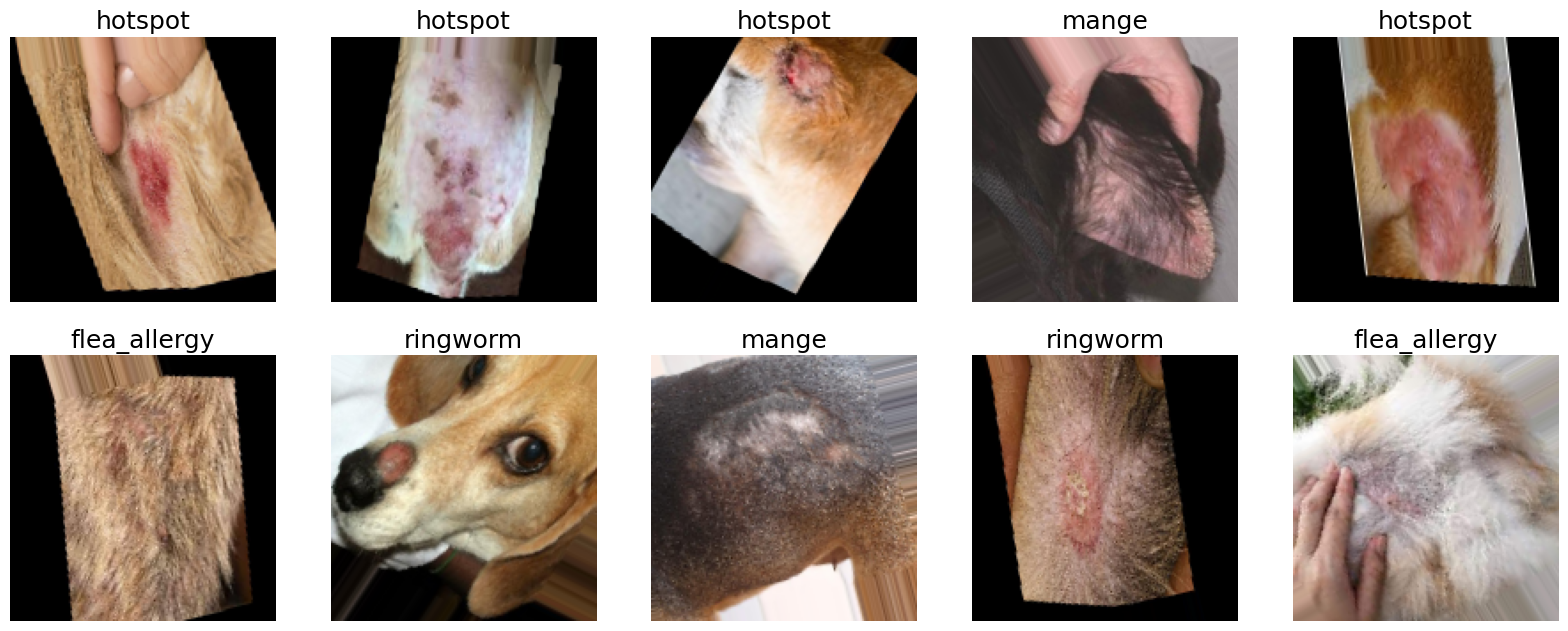

In [8]:
show_image_samples(train_generator)

Epoch 1/25


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 3/25 ━━━━━━━━━━━━━━━━━━━━ 44:46 122s/step - accuracy: 0.3712 - loss: 1.3471

C:\Users\ASUS\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 499s 14s/step - accuracy: 0.3819 - loss: 1.3408 - val_accuracy: 0.3625 - val_loss: 1.3386
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 564s 19s/step - accuracy: 0.4007 - loss: 1.3013 - val_accuracy: 0.2750 - val_loss: 1.3368
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 563s 16s/step - accuracy: 0.3798 - loss: 1.2800 - val_accuracy: 0.3125 - val_loss: 1.3007
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 464s 14s/step - accuracy: 0.4096 - loss: 1.2492 - val_accuracy: 0.4000 - val_loss: 1.2427
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 466s 15s/step - accuracy: 0.4619 - loss: 1.2195 - val_accuracy: 0.4500 - val_loss: 1.2156
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 452s 13s/step - accuracy: 0.4396 - loss: 1.2088 - val_accuracy: 0.4375 - val_loss: 1.2088
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 415s 11s/step - accuracy: 0.4660 - loss: 1.1654 - val_accuracy: 0.4750 - val_loss: 1.1401
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 437s 13s/step - accuracy: 0.4880 - loss: 1.1556 - val_accuracy: 0.5375 - val_

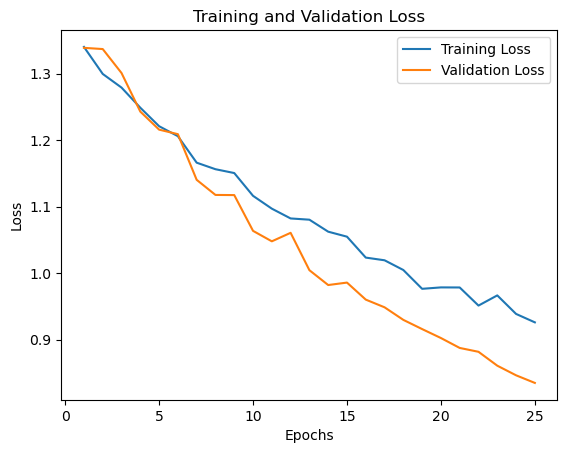

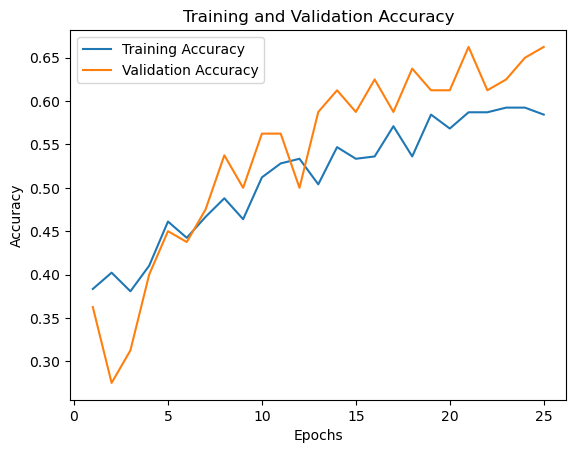

1/1 ━━━━━━━━━━━━━━━━━━━━ 59s 59s/step


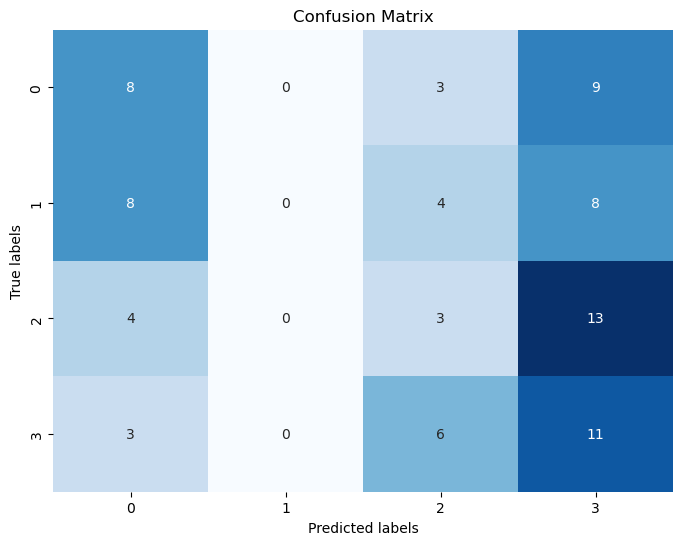

In [20]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

## Loading VGG16 model
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False ## Not trainable weights

## Preprocessing input
#train_ds = preprocess_input(train_generator) 
#test_ds = preprocess_input(validation_generator)

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
dense_layer_3 = layers.Dense(8, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    prediction_layer
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

EPOCHS = 25

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=25)

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plot loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes

#Confusion Matrix Inception V3
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

## Loading VGG16 model
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False ## Not trainable weights

## Preprocessing input
#train_ds = preprocess_input(train_generator) 
#test_ds = preprocess_input(validation_generator)

from tensorflow.keras import layers, models

maxpool_2d = layers.MaxPool2D((2,2), strides = 2)
dropout = layers.Dropout(0.2)
flatten_layer = layers.Flatten()
prediction_layer = layers.Dense(4, activation='softmax')


model = models.Sequential([
    base_model,
    maxpool_2d,
    dropout,
    flatten_layer,
    prediction_layer
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

EPOCHS = 25

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=25)

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plot loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes

#Confusion Matrix Inception V3
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/25
 2/25 ━━━━━━━━━━━━━━━━━━━━ 46:12 121s/step - accuracy: 0.2437 - loss: 2.0115  